In [11]:
df.head()

,Sequence Length,Output Length,Semaphores,Tokens per Second,Mean Latency,90th Percentile Latency,Total Time
0,512,50,5,155.80,1.52,1.53,30.47
1,512,50,13,276.16,2.18,2.22,17.36
2,512,50,21,333.89,2.85,2.94,14.16
3,512,50,29,370.62,3.41,3.60,13.00
4,512,50,37,383.91,4.19,4.48,12.34


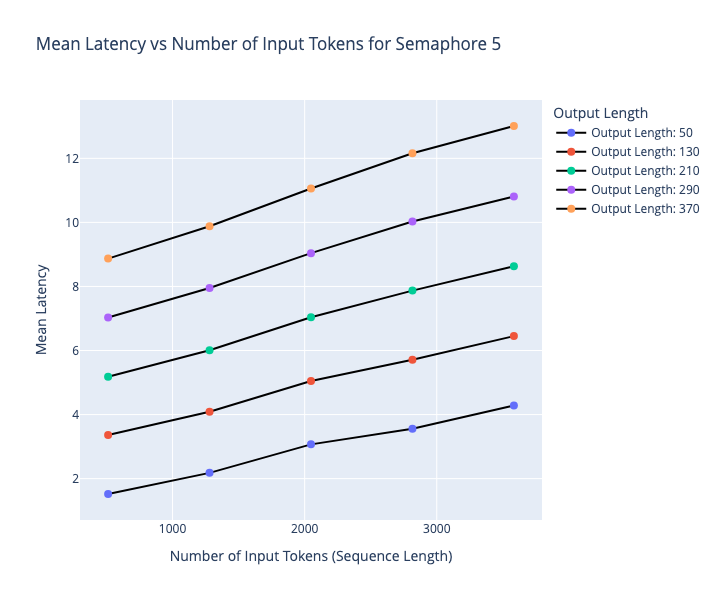

In [14]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file
df = pd.read_csv('./Data/benchmark_results_llama3.1_a10-latency_test-vllm.csv')

# Filter data for Semaphore 5
df_semaphore_5 = df[df['Semaphores'] == 5]

# Create the scatter plot
fig = go.Figure()

# Add traces for each output length
for output_length in df_semaphore_5['Output Length'].unique():
    df_subset = df_semaphore_5[df_semaphore_5['Output Length'] == output_length]
    fig.add_trace(go.Scatter(
        x=df_subset['Sequence Length'],
        y=df_subset['Mean Latency'],
        mode='lines+markers',
        name=f'Output Length: {output_length}',
        marker=dict(
            size=8,
            color=output_length,
            colorscale='Viridis',
            showscale=False,
            colorbar=dict(title='Output Length')
        )
    ))

# Update layout
fig.update_layout(
    title='Mean Latency vs Number of Input Tokens for Semaphore 5',
    xaxis_title='Number of Input Tokens (Sequence Length)',
    yaxis_title='Mean Latency',
    legend_title='Output Length',
    width=800,
    height=600
)

# Show the plot
fig.show()

In [15]:
plotly_key = '1K8Y2owGeRY18O6atjyO'

In [17]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [18]:
import chart_studio.plotly as py
import chart_studio

# Set your credentials
chart_studio.tools.set_credentials_file(username='bhuvanesh09', api_key=plotly_key)

# Upload the figure
py.plot(fig, filename='mean_latency_vs_input_tokens', auto_open=False)

'https://plotly.com/~bhuvanesh09/15/'

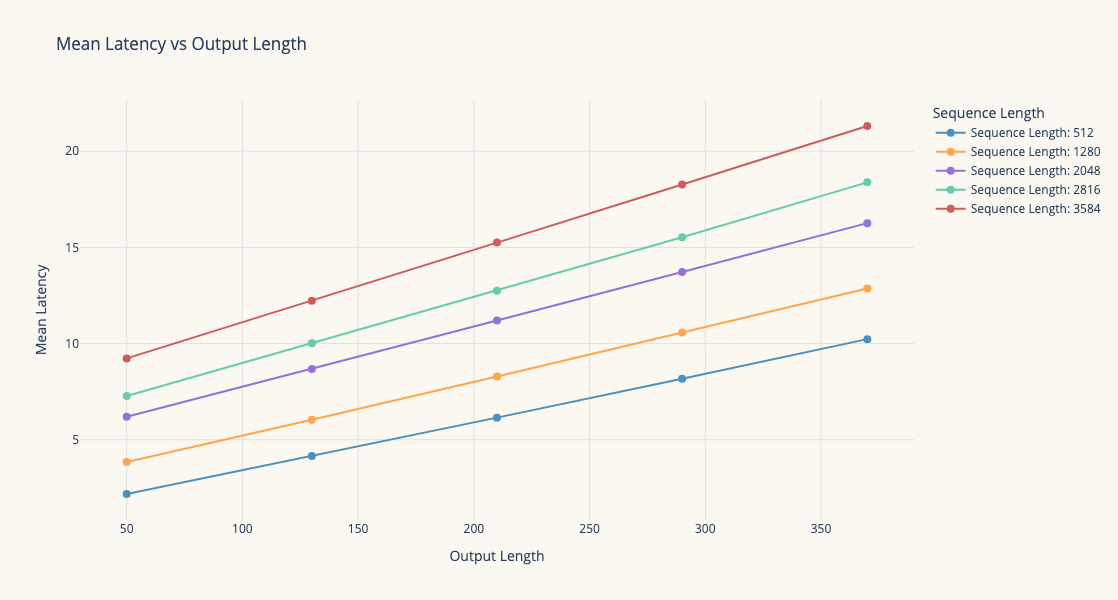

In [58]:
import pandas as pd
import plotly.graph_objects as go

def plot_latency_graph(df, x_axis, y_axis='Mean Latency', color_by='Output Length', semaphore=5):
    # Filter data for the specified semaphore
    df_filtered = df[df['Semaphores'] == semaphore]

    # Create the scatter plot
    fig = go.Figure()

    # Define the custom color scheme
    color_scheme = ['#4A90C0', '#FFA54F', '#9370DB', '#66CDAA', '#CD5C5C']
    
    # Add traces for each unique value in the color_by column
    for i, value in enumerate(df_filtered[color_by].unique()):
        df_subset = df_filtered[df_filtered[color_by] == value]
        fig.add_trace(go.Scatter(
            x=df_subset[x_axis],
            y=df_subset[y_axis],
            mode='lines+markers',
            name=f'{color_by}: {value}',
            line=dict(color=color_scheme[i % len(color_scheme)]),
            marker=dict(
                size=8,
                color=color_scheme[i % len(color_scheme)],
            )
        ))

    fig.update_layout(
        title=f'{y_axis} vs {x_axis}',
        xaxis_title=x_axis,
        yaxis_title=y_axis,
        legend_title=color_by,
        width=800,
        height=600,
        plot_bgcolor='#FAF8F1',
        paper_bgcolor='#FAF8F1',
        xaxis=dict(gridcolor='#E0E0E0', gridwidth=1),
        yaxis=dict(gridcolor='#E0E0E0', gridwidth=1)
    )

    # Show the plot
    fig.show()
    return fig

# Read the CSV file
df = pd.read_csv('./Data/benchmark_results_llama3.1_a10-latency_test-vllm.csv')

# Example usage:
# Plot Mean Latency vs Sequence Length (Input Tokens)
fig = plot_latency_graph(df, x_axis='Output Length', color_by="Sequence Length", semaphore=13)

# Plot Mean Latency vs Output Length
# plot_latency_graph(df, x_axis='Output Length')

# Plot Mean Latency vs Semaphores
# plot_latency_graph(df, x_axis='Semaphores', color_by='Sequence Length')

# You can also change the y-axis to other latency metrics if available in your dataset
# plot_latency_graph(df, x_axis='Sequence Length', y_axis='90th Percentile Latency')

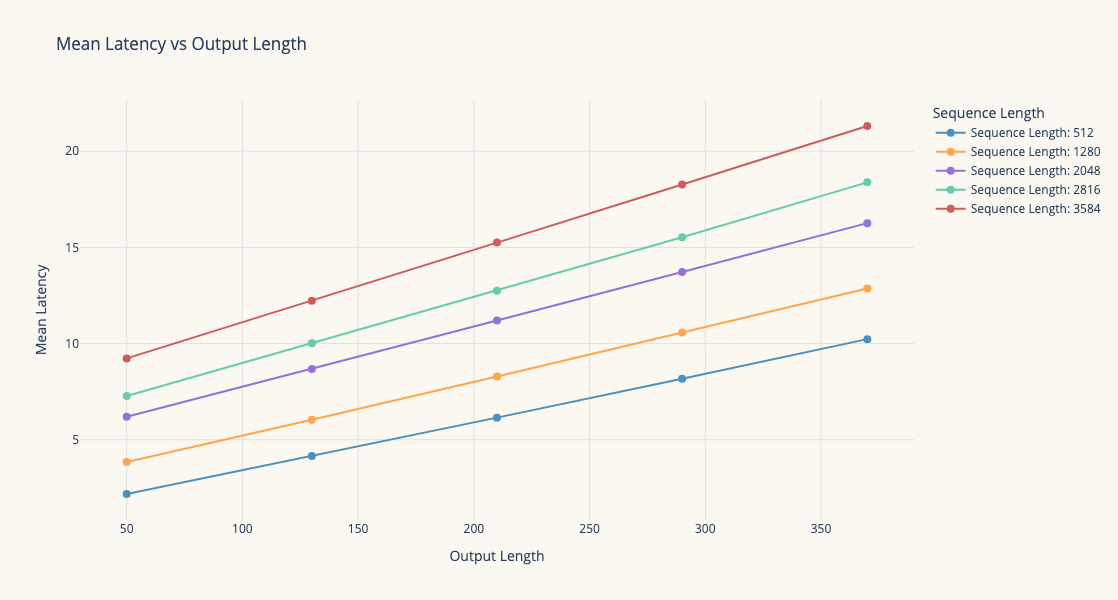

In [59]:
fig.show()

In [60]:
py.plot(fig, filename='mean_latency_vs_output_tokens', auto_open=False)

'https://plotly.com/~bhuvanesh09/17/'

In [38]:
df = df[(df["Mean Latency"] - df['90th Percentile Latency']) > -1]

In [40]:
df

,Sequence Length,Output Length,Semaphores,Tokens per Second,Mean Latency,90th Percentile Latency,Total Time
0,512,50,5,155.80,1.52,1.53,30.47
1,512,50,13,276.16,2.18,2.22,17.36
2,512,50,21,333.89,2.85,2.94,14.16
3,512,50,29,370.62,3.41,3.60,13.00
4,512,50,37,383.91,4.19,4.48,12.34
...,...,...,...,...,...,...,...
116,3584,290,13,189.56,18.27,18.79,144.98
117,3584,290,21,211.99,25.97,25.25,131.08
120,3584,370,5,137.77,13.01,13.02,260.26
121,3584,370,13,211.86,21.31,21.78,169.14


In [42]:
df.columns

Index(['Sequence Length', 'Output Length', 'Semaphores', 'Tokens per Second',
       'Mean Latency', '90th Percentile Latency', 'Total Time'],
      dtype='object')

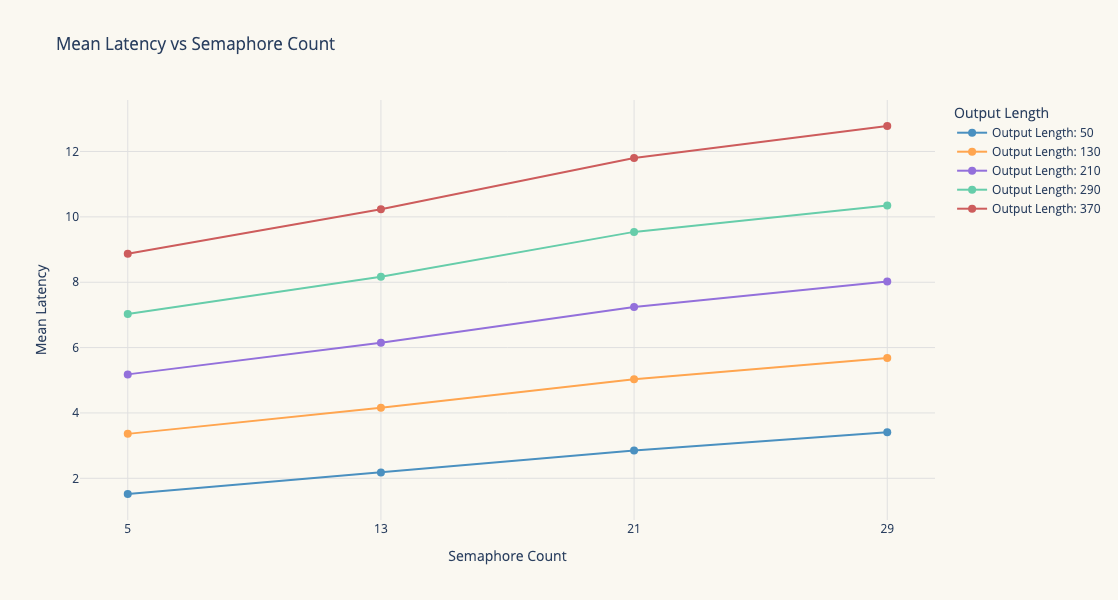

In [61]:
# Define the custom color scheme
color_scheme = ['#4A90C0', '#FFA54F', '#9370DB', '#66CDAA', '#CD5C5C']

df_512 = df[df['Sequence Length'] == 512]
df_512 = df_512[df_512['Semaphores'] < 37]

# Create the scatter plot
fig = go.Figure()

# Add traces for each output length
for i, output_length in enumerate(df_512['Output Length'].unique()):
    df_subset = df_512[df_512['Output Length'] == output_length]
    fig.add_trace(go.Scatter(
        x=df_subset['Semaphores'],
        y=df_subset['Mean Latency'],
        mode='lines+markers',
        name=f'Output Length: {output_length}',
        line=dict(color=color_scheme[i % len(color_scheme)], width=2),
        marker=dict(
            size=8,
            color=color_scheme[i % len(color_scheme)],
        )
    ))

# Update layout
fig.update_layout(
    title='Mean Latency vs Semaphore Count',
    xaxis_title='Semaphore Count',
    yaxis_title='Mean Latency',
    legend_title='Output Length',
    width=800,
    height=600,
    plot_bgcolor='#FAF8F1',
    paper_bgcolor='#FAF8F1',
    xaxis=dict(gridcolor='#E0E0E0', gridwidth=1, tickmode='linear', tick0=5, dtick=8),
    yaxis=dict(gridcolor='#E0E0E0', gridwidth=1)
)

# Show the plot
fig.show()

In [62]:
py.plot(fig, filename='mean_latency_vs_semaphore', auto_open=False)

'https://plotly.com/~bhuvanesh09/19/'

In [47]:
df[df["Sequence Length"] == 2048]

,Sequence Length,Output Length,Semaphores,Tokens per Second,Mean Latency,90th Percentile Latency,Total Time
50,2048,50,5,77.89,3.07,3.08,61.50
51,2048,50,13,97.17,6.20,6.36,49.14
52,2048,50,21,104.84,9.31,9.67,46.14
53,2048,50,29,106.15,11.92,12.77,44.63
54,2048,50,37,107.27,15.18,15.92,44.04
55,2048,130,5,123.65,5.05,5.06,101.10
56,2048,130,13,178.07,8.68,8.87,68.87
57,2048,130,21,207.33,12.29,12.73,60.94
59,2048,130,37,219.26,19.64,20.29,56.31
60,2048,210,5,143.85,7.04,7.05,140.90


In [50]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/7.8 MB 33.5 kB/s eta 0:03:05:31^C
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/7.8 MB 33.5 kB/s eta 0:03:05


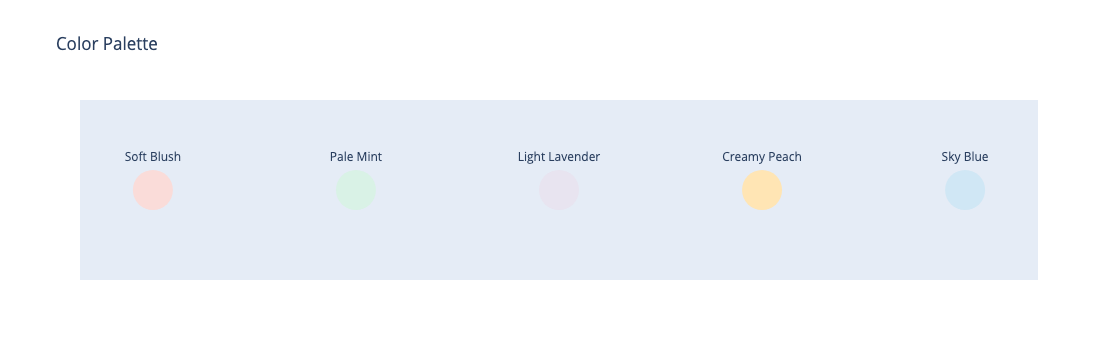

In [51]:
import plotly.graph_objects as go

# Define colors and their names
colors = ['#FADCD9', '#D9F2E6', '#E8E4F0', '#FFE5B4', '#D0E7F5']
names = ['Soft Blush', 'Pale Mint', 'Light Lavender', 'Creamy Peach', 'Sky Blue']

# Create the figure
fig = go.Figure()  

# Add each color to the figure
for i, (color, name) in enumerate(zip(colors, names)):
    fig.add_trace(go.Scatter(
        x=[i], y=[0],
        mode='markers+text',
        marker=dict(size=40, color=color),
        text=name,
        textposition='top center',
        hoverinfo='text'
    ))

# Update the layout
fig.update_layout(
    title='Color Palette',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

# Show the figure
fig.show()

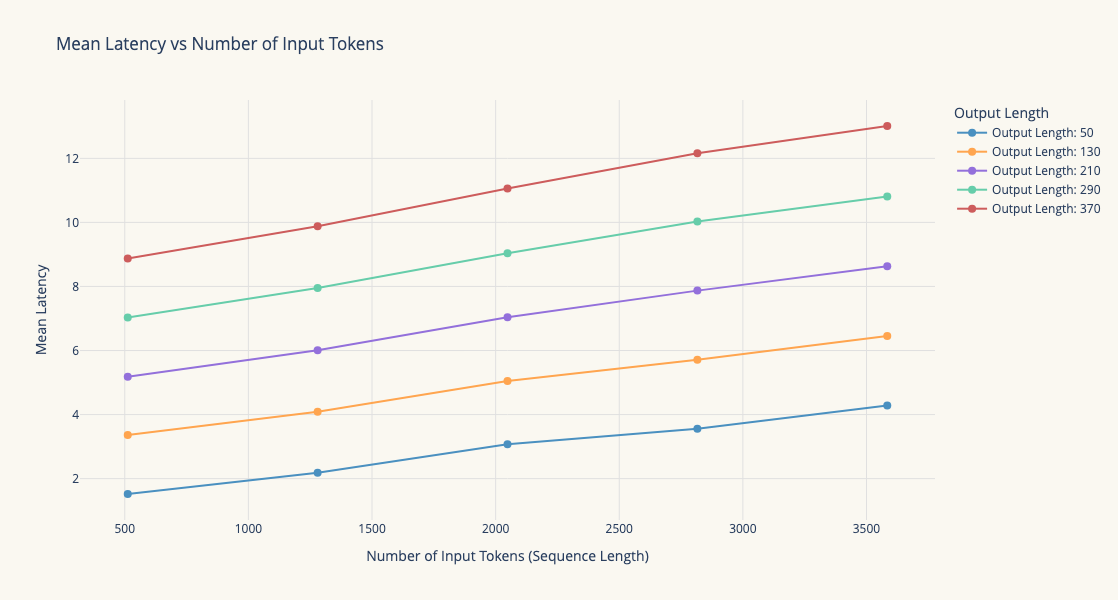

In [55]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file
df = pd.read_csv('./Data/benchmark_results_llama3.1_a10-latency_test-vllm.csv')

# Filter data for Semaphore 5
df_semaphore_5 = df[df['Semaphores'] == 5]

# Create the scatter plot
fig = go.Figure()

# Define darker custom color scheme
color_scheme = ['#4A90C0', '#FFA54F', '#9370DB', '#66CDAA', '#CD5C5C']

# Add traces for each output length
for i, output_length in enumerate(df_semaphore_5['Output Length'].unique()):
    df_subset = df_semaphore_5[df_semaphore_5['Output Length'] == output_length]
    fig.add_trace(go.Scatter(
        x=df_subset['Sequence Length'],
        y=df_subset['Mean Latency'],
        mode='lines+markers',
        name=f'Output Length: {output_length}',
        line=dict(color=color_scheme[i % len(color_scheme)]),
        marker=dict(
            size=8,
            color=color_scheme[i % len(color_scheme)],
        )
    ))

# Update layout
fig.update_layout(
    title='Mean Latency vs Number of Input Tokens',
    xaxis_title='Number of Input Tokens (Sequence Length)',
    yaxis_title='Mean Latency',
    legend_title='Output Length',
    width=800,
    height=600,
    plot_bgcolor='#FAF8F1',
    paper_bgcolor='#FAF8F1',
    xaxis=dict(gridcolor='#E0E0E0', gridwidth=1),
    yaxis=dict(gridcolor='#E0E0E0', gridwidth=1)
)

# Show the plot
fig.show()

In [56]:


# Upload the figure
py.plot(fig, filename='mean_latency_vs_input_tokens', auto_open=False)

'https://plotly.com/~bhuvanesh09/15/'

In [ ]:
# Define the custom color scheme
color_scheme = ['#4A90C0', '#FFA54F', '#9370DB', '#66CDAA', '#CD5C5C']

# Add traces for each unique value in the color_by column
for i, value in enumerate(df_filtered[color_by].unique()):
    df_subset = df_filtere